## Figure 4. Model-based analysis explore the adaptation mechanism of the transcriptional regulation of metabolic network. 
- A.Construction and analytic workflows  
- B.Activated metabolic network size comparison.  
- C.Loss of reaction in strains compared to wild type.  
- D.Pathway enrichment analysis for core reactions loss in different clade compared to wild type.  
- E.Transcription and flux correlation analysis  
- F.Highly correlated reaction pathway enrichment analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import scipy.stats as stats
from scipy.stats import pearsonr

# set work directory
os.chdir(r'D:\code\github\Unified_Yeast_GEMs_Database')

In [2]:
# set figure parameters
# set the font size of the figure
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 1

axis_fontdict={'fontsize':8,'fontweight':'bold'}
label_fontdict={'fontsize':10,'fontweight':'bold'}
title_fontdict={'fontsize':12,'fontweight':'bold'}

colors_set=sns.color_palette('Dark2')
colors_set

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4)]

### Figure 4A. Construction and analytic workflow
(Draw in PPT)

### Figure 4B.Activated metabolic network size comparison.

In [3]:
# load data
df_model_size=pd.read_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/gimme_ssGEMs_size.csv')
df_model_size
# rename the type column, if . exist in string, split and only keep the second part
df_model_size['type']=df_model_size['type'].apply(lambda x: x.split('.')[1] if '.' in x else x)
df_model_size


,Unnamed: 0,gene_number,reaction_number,metabolite_number,type
0,CDL_3.re,1022,3766,2674,wildtype
1,CDI_1.re,997,3736,2630,wildtype
2,YCM.re,1028,3731,2656,wildtype
3,CDA_2.re,1031,3741,2659,wildtype
4,AHH_3.re,1046,3758,2666,wildtype
...,...,...,...,...,...
738,BIB_1.re,1007,3740,2645,Wine/European
739,BIA_1.re,1012,3723,2666,Wine/European
740,BHV_1.re,1007,3737,2632,Wine/European
741,BHN_4.re,1032,3751,2712,Wine/European


C:\Users\wangh\AppData\Local\Temp\ipykernel_27720\1091964140.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="type", y="gene_number", data=df_model_size,ax=ax[0],palette=colors_set,showfliers=False)
C:\Users\wangh\AppData\Local\Temp\ipykernel_27720\1091964140.py:5: UserWarning: 
The palette list has fewer values (8) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x="type", y="gene_number", data=df_model_size,ax=ax[0],palette=colors_set,showfliers=False)
C:\Users\wangh\AppData\Local\Temp\ipykernel_27720\1091964140.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="type", y="reaction_number", data=df_model_size,ax=ax[1],palette=colors_set,

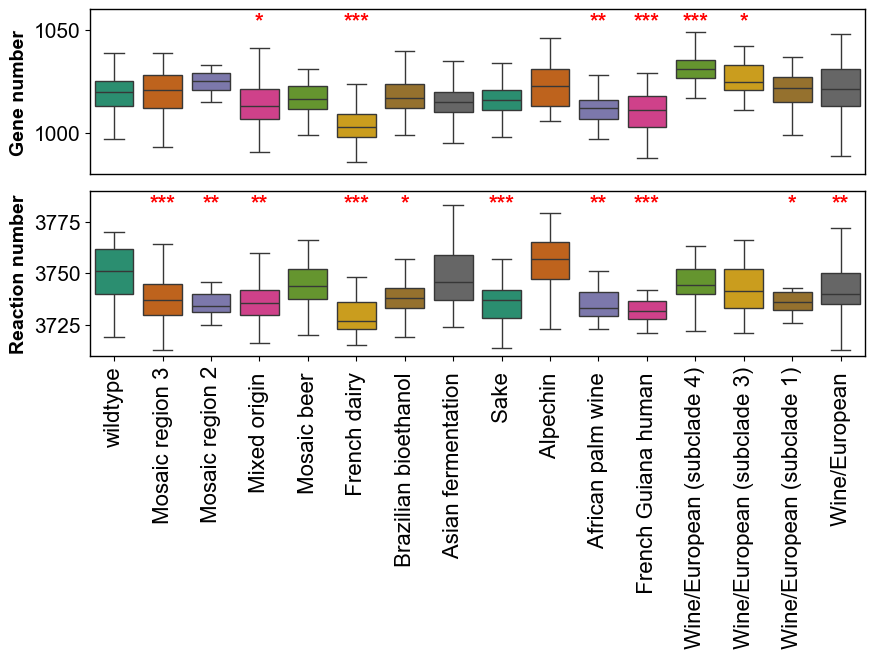

In [23]:
fig,ax=plt.subplots(2,1,figsize=(10,4.5))

# plot the gene number distribution
# do not show out
sns.boxplot(x="type", y="gene_number", data=df_model_size,ax=ax[0],palette=colors_set,showfliers=False)
ax[0].set_ylabel('Gene number',fontsize=14,fontdict=axis_fontdict)
# remove x axis and x label
ax[0].set_xlabel('')
# remove x ticks
ax[0].set_xticks([])
# set y lim
ax[0].set_ylim(980,1060)
# set y ticks font
ax[0].tick_params(axis='y',labelsize=15)

# calculate the p value of each type to wildtype
from scipy import stats
df_p = pd.DataFrame()
for t in df_model_size['type'].unique():
    if t != 'wildtype':
        p = stats.ttest_ind(df_model_size[df_model_size['type']==t]['gene_number'], df_model_size[df_model_size['type']=='wildtype']['gene_number']).pvalue
        if p < 0.05:
            # print(t, p)
            # add p value to plot
            if p<0.001:
                sig='***'
            elif p<0.01:
                sig='**'
            else:
                sig='*'
            ax[0].text(df_model_size['type'].unique().tolist().index(t),1049,sig,ha='center',va='bottom',fontsize=16,fontweight='bold',color='Red')

# plot the reaction number distribution
sns.boxplot(x="type", y="reaction_number", data=df_model_size,ax=ax[1],palette=colors_set,showfliers=False)
ax[1].set_ylabel('Reaction number',fontsize=14,fontdict=axis_fontdict)
ax[1].set_xlabel('')
# rotate x label
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=90,fontsize=16)
ax[1].set_ylim(3710,3790)
# set y ticks font
ax[1].tick_params(axis='y',labelsize=15)
# calculate the p value of each type to wildtype
for t in df_model_size['type'].unique():
    if t != 'wildtype':
        p = stats.ttest_ind(df_model_size[df_model_size['type']==t]['reaction_number'], df_model_size[df_model_size['type']=='wildtype']['reaction_number']).pvalue
        if p < 0.05:
            # print(t, p)
            # add p value to plot
            if p<0.001:
                sig='***'
            elif p<0.01:
                sig='**'
            else:
                sig='*'
            ax[1].text(df_model_size['type'].unique().tolist().index(t),3779,sig,ha='center',va='bottom',fontsize=16,fontweight='bold',color='Red')

# make the distance between two subplots closer
plt.subplots_adjust(hspace=0.1)

plt.savefig('figures/output/figure4_gimme_model_size_comparison.svg',bbox_inches='tight',dpi=400,transparent=True)

plt.show()

### Figure 4C. Loss of reaction in strains compared to wild type

In [3]:
# load data
df_lostrxn_count=pd.read_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/allstrain_core_rxn_loss.csv',index_col=0)
df_lostrxn_enr=pd.read_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/allstrain_lost_corerxn_enrichment_analysis.csv',index_col=0)

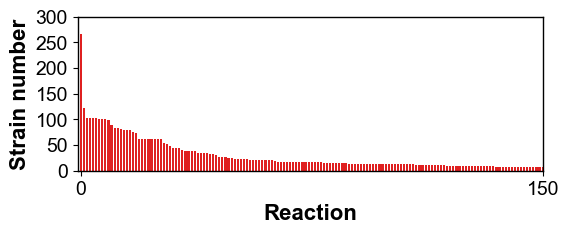

In [7]:
fig,ax=plt.subplots(figsize=(6,2))
# set bar width
width=0.7  # Adjust the width value here
# plot bar plot
# plt.bar(np.arange(len(df_lostrxn_count)),df_lostrxn_count['0'],width=width,color='red')
sns.barplot(x=df_lostrxn_count.index,y='0',data=df_lostrxn_count,color='red',width=width)
# plt.title('Wildtype core reaction loss among other strains',fontdict=title_fontdict)
plt.ylabel('Strain number',fontsize=16,fontdict=label_fontdict)
plt.xlabel('Reaction',fontsize=16,fontdict=label_fontdict)
# do not show x label
plt.xticks([])
# set x range
plt.xlim(-1,150)
# label 0 , 300 in x axis
plt.xticks([0,150],['0','150'],rotation=0,fontsize=14)
# set y tick
plt.yticks(np.arange(0,350,50),fontsize=14)
# save result
plt.savefig('figures/output/figure4_wtcore_rxn_loss.svg',bbox_inches='tight',dpi=400,transparent=True)
plt.show()

d:\softwares\programming\anoconda\envs\data\Lib\site-packages\gseapy\plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


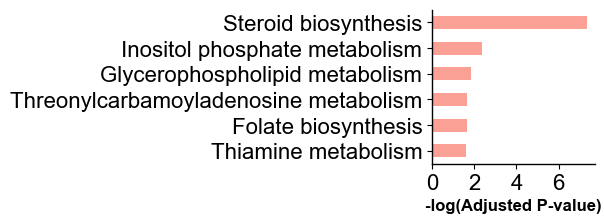

In [12]:
from gseapy import barplot
ax=barplot(df_lostrxn_enr,
                column='Adjusted P-value',
                    title='',cutoff=0.05,figsize=(2.1,2))
# reset x label
ax.set_xlabel('-log(Adjusted P-value)',fontsize=12,fontdict=label_fontdict)
# save result
ax.figure.savefig('figures/output/figure4_wtcore_rxn_loss_enrichment.svg',bbox_inches='tight',dpi=400,transparent=True)

### Figure 4D. Pathway enrichment analysis for core reactions loss in different clade compared to wild type.  

In [14]:
# load data
df_clades_score=pd.read_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/clade_lost_rxn_enrichment_analysis.csv',index_col=0)
df_clades_score.astype(float)
# reset columns name, if . exist in column name, split and only keep the 2 part
re_columns=[col.split('.')[1] if '.' in col else col for col in df_clades_score.columns]
df_clades_score.columns=re_columns
df_clades_score
# reset columns order acording to the length of column name
df_clades_score=df_clades_score.reindex(sorted(df_clades_score.columns, key=lambda x: len(x)), axis=1)
# remove column with all 0 values
df_clades_score=df_clades_score.loc[:,df_clades_score.sum()!=0]

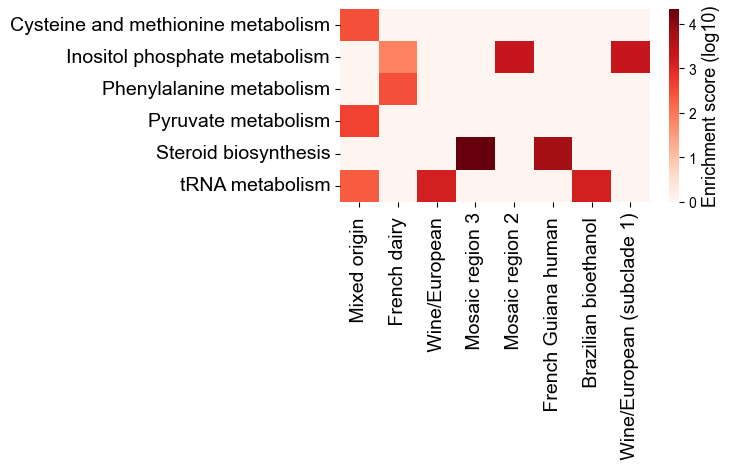

In [17]:
plt.figure(figsize=(5, 2.5))
df_clades_score_log=np.log10(df_clades_score+1)
sns.heatmap(df_clades_score_log, cmap="Reds")
# plt.title('Pathway enrichment for lost reactions in different clades',fontdict=title_fontdict)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
# # set color bar title
cbar = plt.gca().collections[0].colorbar
cbar.set_label('Enrichment score (log10)',fontsize=13)
# save result
plt.savefig('figures/output/figure4_clade_rxn_loss_enrichment.svg',bbox_inches='tight',dpi=400,transparent=True)
plt.show()

### Figure 4E.Highly correlated reaction pathway enrichment analysis 

In [52]:
# load data
flux_expression_r=pd.read_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/flux_expression_correlation.csv',index_col=0)
flux_expression_r
correlated_rxn_enr=pd.read_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/flux&expression_enrichment_analysis.csv')
correlated_rxn_enr
flux_expression_r['correlation'].describe()

count    829.000000
mean       0.017716
std        0.067930
min       -0.403649
25%        0.000000
50%        0.000000
75%        0.000000
max        0.527030
Name: correlation, dtype: float64

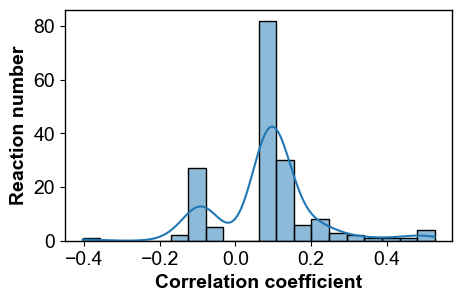

In [56]:
fig,ax=plt.subplots(figsize=(5,3))
sns.histplot(flux_expression_r.loc[flux_expression_r['p-value']<0.05,'correlation'],kde=True,bins=20,ax=ax)
ax.set_xlabel('Correlation coefficient',fontsize=14,fontdict=label_fontdict)
ax.set_ylabel('Reaction number',fontsize=14,fontdict=label_fontdict)
# set tick font
ax.tick_params(labelsize=14)
# set x axis limit
# plt.xlim(-1,1)
# save result
plt.savefig('figures/output/figure4_flux_expression_correlation.svg',bbox_inches='tight',dpi=400,transparent=True)
plt.show()

### Figure 4F.Highly correlated reaction pathway enrichment analysis 

d:\softwares\programming\anoconda\envs\data\Lib\site-packages\gseapy\plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


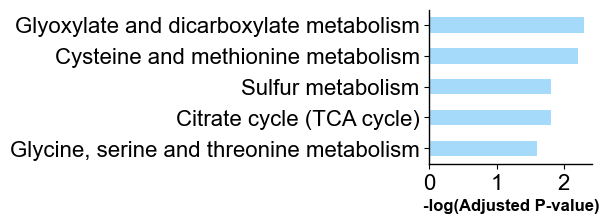

In [59]:
from gseapy import barplot

barplot(correlated_rxn_enr,
                column='Adjusted P-value',
                    title='',cutoff=0.05,figsize=(2.1,2),color='lightskyblue')

# reset x label
plt.xlabel('-log(Adjusted P-value)',fontsize=12,fontdict=label_fontdict)
# save result
plt.savefig('figures/output/figure4_flux_expression_enrichment.svg',bbox_inches='tight',dpi=400,transparent=True)

#### Additioanl. RNAseq data relative growth data

C:\Users\wangh\AppData\Local\Temp\ipykernel_3980\2037285980.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_liquid_grwoth,bins=40,kde=False,ax=ax)


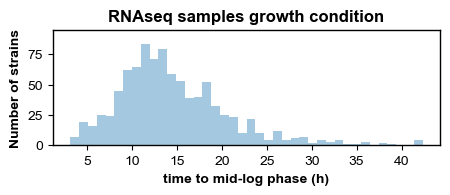

In [7]:
#load experimental data
df_exp_data=pd.read_csv('data/transcriptomics/combined_969growth_data.csv',index_col=0)
# remove rows with genome_id is NaN
df_exp_data=df_exp_data[df_exp_data['genome_id'].notnull()]
#set genome_id as index
df_exp_data=df_exp_data.set_index('genome_id')

df_liquid_grwoth=df_exp_data['t_mid_norm']
# remove nan values
df_liquid_grwoth=df_liquid_grwoth[df_liquid_grwoth.notnull()]

# plot the histogram of df_liquid_grwoth
fig,ax=plt.subplots(figsize=(5,1.5))
# plt.style.use('seaborn-paper')
sns.distplot(df_liquid_grwoth,bins=40,kde=False,ax=ax)
ax.set_xlabel('time to mid-log phase (h)',fontdict=label_fontdict)
ax.set_ylabel('Number of strains',fontdict=label_fontdict)
# set y lim
plt.ylim(0,95)
# set title
ax.set_title('RNAseq samples growth condition',fontdict=title_fontdict)
plt.show()
# save figure
fig.savefig('figures/output/additional4_RNAseq_growth_data.svg',bbox_inches='tight',dpi=400,transparent=True)